# Sección adicional (+1)

Antes de abordar el tema de esta unidad vamos a presentar una funció de Python que sirve para ingresar datos a un script de manera interactiva, es decir, con esta instrucción el script nos solicitará ingresar un dato y no continuará hasta que pueda leerlo.

Veamos esta función: **input( )**

In [ ]:
x=input("Dame numero:\n")
# El dato se ingresa como un dato de tipo string
# Si queremos interpretarlo como numero, debemos convertirlo

y=eval(x)

if y%2==0:
  print("El numero es par")
else:
  print("El numero es impar")

# Introducción al Cómputo en Paralelo con PyCuda

Colab puede proporcionarnos acceso a una tarjeta gráfica Nvidia; previo a aprender sobre ella habilitaremos este acceso.

En la parte superior de un notebook de Colab encontramos el menú <font color='red'>Runtime</font>, y dentro de ese menú tenemos <font color='red'>Change Runtime type</font>.

Cuando seleccionamos <font color='red'>Change Runtime type</font> se abrirá un menú que nos pedirá seleccionar si deseamos habilitar la *aceleración por Hardware*; allí elegiremos la opción **GPU**. Veamos una imagen de cómo debe verse este menú:

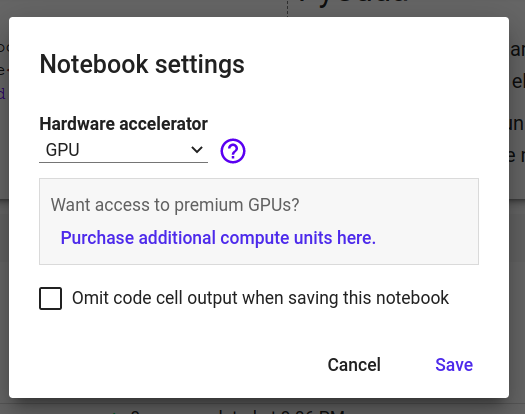

Y guardamos los cambios...

Hecho esto aparecerá un cuadro de diálogo preguntando si deseamos reiniciar la sesión puesto que hemos cambiado el entorno de ejecución. En ese cuadro debemos aceptar reiniciar la sesión:

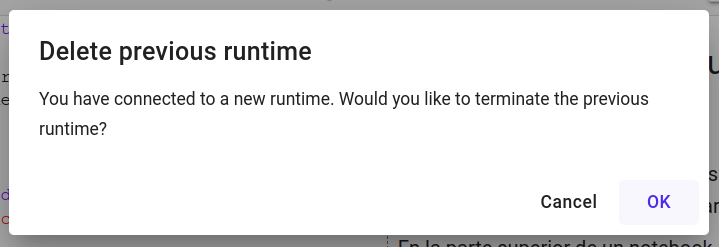

Con el siguiente comando verificaremos qué modelo de tarjeta gráfica tenemos asignada y algunas de sus características:

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!nvidia-smi --format=csv --query-gpu=memory.total

memory.total [MiB]
15109 MiB


Podemos verificar que tenemos instalado el compilador de Cuda:

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


###Introducción
Cuando hablamos de Cómputo en Paralelo nos referimos a la posibilidad de ejecutar muchos procesos de forma simultánea. Podemos pensar en un ejemplo muy sencillo para fijar ideas, a saber, imaginemos que tenemos un arreglo de 10,000 entradas y queremos asignar a cada entrada un cierto valor, por ejemplo un número al azar. 

Una manera de realizar esta asignación de valores a las entradas de un arreglo es a través de un ciclo (*for* por ejemplo), es decir, recorrer cada entrada del arreglo, elegir un número al azar y guardarlo en la entrada correspondiente. Sin embargo, no es difícil reconocer que esta aproximación al problema puede ser "muy lenta".

Ahora imaginemos que tenemos 10,000 computadoras (*procesos* sería un término más preciso) que pueden acceder a nuestro arreglo, y cada una de ellas la ponemos a cargo de una entrada diferente del arreglo; además les damos la tarea de elegir un número al azar y copiarlo a la entrada del arreglo que tienen a su cargo. En comparación con el método del ciclo, inmediatamente podemos reconocer que ésta sería una solución más rápida, puesto que a todas las entradas del arreglo se les está asignando un valor de forma simultánea.

Una aproximación más realista consiste en no utilizar 10,000 computadoras, sino una sóla pieza de Hardware que sea capaz de correr ese mismo número de procesos, a saber, una tarjeta gráfica o GPU que podemos programar.

Nvidia es un fabricante de tarjetas gráficas cuyos productos pueden considerarse un estándar a pesar no ser *open-source*. El lenguaje que se utiliza para programar estas tarjetas es CUDA (*Compute Unified Device Architecture*). Cabe señalar que existen otras alternativas basadas en OPENGL.

Para poner en contexto la opción de programar en CUDA desde Colab, conviene revisar qué alternativas tenemos fuera de un servidor remoto:



* Es necesario adquirir una tajeta gráfica (compatible con CUDA)
* Existen diferentes maneras de conectar la tarjeta gráfica a nuestra computadora, la opción más estándar es a través de un puerto PCI. Sin embargo, también es posible utilizar un *riser* o un adaptador externo sacrificando la tarjeta de red. <font color='blue'> Esto inmediatamente dibuja un escenario poco favorable para abordar este tipo de programación en clase; ya que, aún si en un aula tuvieramos suficientes tarjetas instaladas, los alumnos sólo podrían hacer uso de ellas exclusivamente en clase limitando su aprendizaje al aula; o incluso si cada alumno adquiriera su propia tarjeta, necesitaríamos brindar ayuda ante los problemas de instalación y configuración de las tajetas en la diversidad de equipos.</font>   

En Colab, una vez hemos habilitado la _"aceleración por GPU"_, tenemos instalados los drivers de la tarjeta, así como el *cuda toolkit* que incluye las herramientas para programar el GPU.

Programar un GPU de Nvidia requiere escribir código en C++ y conocer además ciertas funciones que nos permiten comunicarnos con la tarjeta. Sin embargo, comenzaremos a abordar la programación en paralelo a través de Python con el módulo Pycuda, el cual requiere que escribamos una parte del código en C++. Sin embargo, la *administración de la memoria* la configuraremos a partir de comandos en Python. 

Utilizar Pycuda en lugar de Cuda-C tiene como ventaja facilitar la lectura del código, lo cual académicamente tiene cierto valor.

Comenzaremos por instalar el módulo **Pycuda**:


In [ ]:

!pip install pycuda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycuda-2022.2.2.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pytools-2022.1.14.tar.gz (74 kB)
  Preparing metadata (setup.py) ... done
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Created wheel for pycuda: filename=pycuda-2022.2.2-cp38-cp38-linux_x86_64.whl size=646530 sha256=a93e5628d1464e9e27e43e64b53f2e9e8fef1ac7f691ee175bafcf25c5f7f70c
  Stored in directory: /root/.cache/pip/wheels/7b/41/0d/7cecb04af969d283ebe4a69579a8b2baec0d010a1ac4159f7e
  Created wheel for pytools: filename=pytools-2022.1.14-py2.py3-none-any.whl size=69870 sha256=fdad43e9788f57f2dd19d0da0be862c47172605ee3b4cdd31eb10d6a796714a4
  Stored in directory: /root/.cache/pip/wheels/cb/fc/a9/1e7e56fe02d7f58eaff555f22e79d4fc2d817012291254bae2
Successfully built pycuda pytools


Las siguientes líneas importan las funciones de Pycuda que necesitaremos para comunicarnos y dar instrucciones a los procesos de la tarjeta gráfica. Además, al no devolvernos un error, comprobamos que la instalación de Pycuda fue correcta.

También importaremos numpy.

In [ ]:
import pycuda.driver as cuda
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
from pycuda.compiler import SourceModule

import numpy as np

Las siguientes 4 celdas nos permitirán ilustrar a grandes rasgos los pasos a recordar cuando queramos hacer un script con pycuda. Detallaremos cada celda a continuación:



1.   El GPU es una pieza de Hardware, por lo que si creamos un arreglo con nuestros *Inputs* y queremos trabajar con ellos en el GPU, necesitamos enviarlos del CPU al GPU. Veamos cómo en la siguiente celda:

In [ ]:
N=1000
V=np.ones(N)
V_gpu=gpuarray.to_gpu(V.astype(np.float64))


2.   Necesitamos escribir una función para el GPU que le diga a cada proceso (*thread*) qué debe hacer con el *Input*. A esta función la llamamos **kernel** y a pesar de estar en Python, necesitamos escribirla en C++ y guardarla en una variable de Python de tipo *string*.

Posteriormente, necesitamos que Python interprete esta *string* como una función para el GPU.



In [ ]:
kernel="""
#include <math.h>
__global__ void asigna(double *X){
  
  int i=threadIdx.x;
  X[i]=i+1.0;
}
"""

kernel_src = SourceModule(kernel)
funcion=kernel_src.get_function("asigna")

# Como ejemplo hemos definido una funcion "asigna"
# que recibe un arreglo y a cada una se sus entradas de asigna
# un valor igual a la suma de
# 1 + 'el número de proceso que controla esa entrada'.


3.   Como tercer paso, ya podemos mandar llamar la función (kernel). Sin embargo, al hacerlo debemos especificar qué procesos del GPU son los que van a estar trabajando; en la siguiente celda esto lo especificamos con el parámetro *block* (más adelante profundizaremos en este parámetro)



In [ ]:
funcion(V_gpu,block=(N,1,1))


4.   Al finalizar la celda anterior, cada proceso terminó su trabajo. Sin embargo, el resultado se encuentra en el GPU por lo que debemos enviarlo devuelta al CPU para poderlo imprimir o guardar. En la siguiente celda hacemos esto:



In [ ]:
V_gpu.get()

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
         82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
         91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,
        100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,
        109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,
        118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,
        127.,  128.,

El ejemplo de las celdas anteriores utliza N=1000 procesos del GPU. Para ilustrar una de las dificultades que tiene este tipo de programación repetiremos todo el ejemplo en una sola celda y modificaremos el numero de procesos a N=1025

In [ ]:
import pycuda.driver as cuda
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
from pycuda.compiler import SourceModule

import numpy as np

N=1025
V=np.ones(N)
V_gpu=gpuarray.to_gpu(V.astype(np.float64))

kernel="""
#include <math.h>
__global__ void asigna(double *X){
  
  int i=threadIdx.x;
  X[i]=i+1.0;
}
"""

kernel_src = SourceModule(kernel)
funcion=kernel_src.get_function("asigna")

funcion(V_gpu,block=(N,1,1))

V_gpu.get()

/usr/local/lib/python3.8/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: device_allocation in out-of-thread context could not be cleaned up
  globals().clear()


LogicError: ignored

La razón del error anterior está relacionada con la manera en que se administran los procesos o *threads* dentro del GPU, a saber, los procesos están organizados por bloques y cada bloque tiene 1024 procesos. A su vez, los bloques de procesos o *threads* se organizan en un grid.

Los *threads* en un bloque pueden habilitarse en 1D, 2D ó 3D; y dentro de cada proceso podemos saber qué número de proceso tiene asignado utilizando:

`threadIdx.x`, `threadIdx.y`, `threadIdx.z`

En el ejemplo anterior, cuando llamamos la función del GPU:

`funcion(V_gpu,block=(N,1,1))`
<br>
estamos especificando que trabajaremos con un bloque de N$\times$1$\times$1 *threads*; sin embargo, cada bloque está limitado a 1024 procesos y en consecuencia el código falla, ya que el kernel intenta acceder a un proceso adicional a los que tiene acceso.

Finalmente estamos en condiciones de explicar qué hace la función `asigna`. Esta función o *kernel* recibe un arreglo y cada proceso que ha sido llamado realiza los siguiente
<br>
`int i=threadIdx.x;`<br>
  `X[i]=i+1.0;`
  <br>
La primer línea `int i=threadIdx.x;` permite a cada *thread* conocer su número de proceso en el bloque y almacena este valor (entero) en la variable `i`. Posteriormente, cada proceso se encarga de modificar una única y diferente entrada del arreglo `X` asignándole el valor `i+1.0`.

Mientras nos limitemos a 1024 threads por bloque, podemos administrar los procesos en bloques de una dos o tres dimensiones, es decir, es igualmente valido cualquiera de los siguientes ejemplos:

`funcion(V_gpu,block=(1024,1,1))`
<br>
`funcion(V_gpu,block=(32,32,1))`
<br>
`funcion(V_gpu,block=(8,4,32))`
<br>
Sin embargo, tendríamos que modificar el kernel para que se comportara de la misma forma que en el ejemplo anterior; ya que, por ejemplo en un arreglo bidimensional, más de un proceso tienen en mismo `threadIdx.x`.

Confirmémoslo si hacer modificaciones al kernel:

In [ ]:
import pycuda.driver as cuda
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
from pycuda.compiler import SourceModule

import numpy as np

N=32
V=np.ones((N,N))
V_gpu=gpuarray.to_gpu(V.astype(np.float64))

kernel="""
#include <math.h>
__global__ void asigna(double *X){
  
  int i=threadIdx.x;
  X[i]=i+1.0;
}
"""

kernel_src = SourceModule(kernel)
funcion=kernel_src.get_function("asigna")

funcion(V_gpu,block=(32,32,1))

V_gpu.get()

/usr/local/lib/python3.8/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: device_allocation in out-of-thread context could not be cleaned up
  globals().clear()


array([[ 1.,  2.,  3., ..., 30., 31., 32.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

Podemos ver que no ocurrió ningún error y que pudimos enviar como INPUT un arreglo bidimensional, modificar algunas de sus entradas y recuperar el arreglo modificado del GPU al CPU. Aunque al no modificar el kernel, el resultado no coincide con el del primer ejemplo.

En algunas ocasiones es necesario trabajar con más de un bloque de procesos, para ello debemos tener presentes otras variables dentro de cada proceso que le permitan a éste acceder al número de proceso y bloque que tiene asignado, estas cariables son:

`blockDim.x`, `blockDim.y`,`blockDim.z` Para saber las dimensiones del bloque a lo largo de cada dirección y,

`blockIdx.x`, `blockIdx.y`, `blockIdx.z` Para saber cuál es el indice del bloque al que pertenece cada proceso.

Parte de la dificultad de organizar las instrucciones para un programa en paralelo consiste en elegir una manera adecuada de administrar la carga de trabajo del GPU en bloques y un grid. 

 `int i=threadIdx.x+blockDim.x*blockIdx.x; 	// x-index` <br>
 `int j=threadIdx.y+blockDim.y*blockIdx.y; 	// y-index`<br>
 `int k=threadIdx.z+blockDim.z*blockIdx.z;  	// z-index`<br>

Veamos un ejemplo de un arreglo en 3 dimensiones utilizando un grid con más de un bloque:
 

In [ ]:
import pycuda.driver as cuda
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
from pycuda.compiler import SourceModule

import numpy as np

N=10
V=np.ones((N,N,N))
V_gpu=gpuarray.to_gpu(V.astype(np.float64))

kernel="""
#include <math.h>
__global__ void asigna(double X[10][10][10]){

  int i=threadIdx.x+blockDim.x*blockIdx.x; // x-index
  int j=threadIdx.y+blockDim.y*blockIdx.y; // y-index
  int k=threadIdx.z+blockDim.z*blockIdx.z; // z-index

  if( (threadIdx.x<10) && (threadIdx.y<10) && (threadIdx.z<10) ){

    /* Como ejemplo vamos a reemplazar el valor 1 en cada entrada por 2 */
    X[i][j][k]=2.0; 
  }

  
}
"""

kernel_src = SourceModule(kernel)
funcion=kernel_src.get_function("asigna")

funcion(V_gpu,block=(N,N,N), grid=(2,1,1))

U=V_gpu.get()

In [ ]:
U.shape

(10, 10, 10)

In [ ]:
U

array([[[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]

### Funciones en el kernel

Por simplicidad, regresaremos al primer ejemplo de un unico bloque. Veremos como definir una función en el kernel que además pueda ser llamada por cada proceso:

In [ ]:
import pycuda.driver as cuda
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
from pycuda.compiler import SourceModule

import numpy as np

N=1024
V=np.ones(N)
V_gpu=gpuarray.to_gpu(V.astype(np.float64))

kernel="""
#include <math.h>

// Definamos una funcion
__host__ __device__ double mi_funcion(int R){
  double k;
  k=R+1.0;
  return(k);}


__global__ void asigna(double *X){
  
  int i=threadIdx.x;
  X[i]=mi_funcion(i);
}
"""

kernel_src = SourceModule(kernel)
funcion=kernel_src.get_function("asigna")

funcion(V_gpu,block=(N,1,1))

V_gpu.get()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.022e+03, 1.023e+03,
       1.024e+03])

Algunas ocasiones mientras escribimos un código necesitamos corroborar que nuestro kernel está accediento al elemento correcto de un arreglo. Una manera sencilla y rápida de realizar estas revisiones es imprimiendo directamente desde un proceso utilizando la instrucción **printf**.

Debemos señalar que si tenemos muchos procesos simultáneos e imprimimos desde todos ellos, es posible que el CPU no logre capturar toda esta información y no se impriman algunos de estos datos, pero como herramienta de debugueo es por demás útil.

In [ ]:
import numpy as np

import pycuda.driver as cuda
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
from pycuda.compiler import SourceModule

kernel2 = """
__host__ __device__ double F(double x)
	{
	
	return(5*x - 2);}
	
	__global__ void Funcion(double a[4][4])
  {
  int i=threadIdx.x+blockDim.x*blockIdx.x; // x-index
  int j=threadIdx.y+blockDim.y*blockIdx.y; // y-index
  int k=threadIdx.z+blockDim.z*blockIdx.z; // z-index

    double bb;
    bb=  F(i+j+k);
    a[i][j]  = bb;
    
    printf("'Value/thread_idxs:' %f,%d,%d,%d\\n",bb,i,j,k);
  }
  """
GPU_function_src=SourceModule(kernel2)
a = np.ones((4,4))

a_gpu = gpuarray.to_gpu(a.astype(np.float64))

GPU_function = GPU_function_src.get_function("Funcion")
GPU_function(a_gpu, block=(4,4,1),grid=(1,1,1))

b=a_gpu.get()
print(b)

### Compilador NVCC
Es el compilador de cuda y es una dependencia de Pycuda. En esta sección utilizaremos algunos de los temas que revisamos en la Unidad 6, a saber, vamos a presentar el programa `Hello World` en cuda.

En este caso, cada proceso tendrá asignada la tarea de imprimir el mensaje `"Hello, world from the device!`. Este ejemplo lo hemos extraido de [este sitio web](https://riptutorial.com/cuda/example/9316/let-s-launch-a-single-cuda-thread-to-say-hello) y aquí lo utilizaremos con un doble propósito: mostrar el programa `hello world` en cuda, y mostrar que podemos compilarlo con las herramientas tradicionales (nvcc) sin usar Pycuda

In [ ]:
%%writefile hello.cu
#include <stdio.h>

// __global__ functions, or "kernels", execute on the device
__global__ void hello_kernel(void)
{
  printf("Hello, world from the device!\n");
}

int main(void)
{
  // greet from the host
  printf("Hello, world from the host!\n");

  // launch a kernel with a single thread to greet from the device
  hello_kernel<<<60,1024>>>();

  // wait for the device to finish so that we see the message
  cudaDeviceSynchronize();

  return 0;
}

Writing hello.cu


In [ ]:
# Compilamos y asignamos un nombre al ejecutable
!nvcc hello.cu -o hello_cuda

In [ ]:
# Corremos el ejecutable
!./hello_cuda

Streaming output truncated to the last 5000 lines.
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from the device!
Hello, world from t

Existen dos funciones más que debemos mencionar

1.   Memoria compartida
2.   Cuda streams


